# Pricing of a HDD Call Option

In this scenario, we delve into the pricing of a HDD Call Option.

**Note:** For those new to finance, call options are financial contracts that give the option buyer the right (but not the obligation) to buy a stock, bond, commodity, or other assets at a specified price within a specific time frame. The underlying asset is the stock, bond, or commodity. Profits are made by the call buyer when the underlying asset's price rises.

## HDD Call Option Definition

Let \( n \) be the maturity of our option in days and \( K \) the strike of our option. The call option is defined as:

\\[
c(t) = e^{-r(t_n-t)}E^Q[\max\{H_n - K, 0\} | F_t]
\\]

> Reference: "On Modelling and Pricing Weather Derivatives" by Peter Alaton.

This formula may seem similar to the one for a vanilla Call where \\( C = \max(S-K,0) \\). Despite the resemblance, there are notable differences.

## Key Differences

1. The reference temperature is 18, representing the average seasonal standard Celsius temperature. This standardization facilitates pricing across markets.
2. Instead of the typical \\( S \\) in vanilla stock options (where \\( S \\) stands for the stock spot price), we have \\( H_n \\) in this formula. Here, \\( H_n \\) symbolizes the cumulative temperature difference, only considering the days when \\( T_t \\) (temperature at time \\( t \\)) is below 18°C. Days with temperatures exceeding this threshold are excluded.

## Estimating Option Price

To price the option, consider the following representation:

This equation outlines the standard option pricing. The initial segment illustrates the option's value decay against a risk-free investment (like a US T-bond). For subsequent calculations, we'll use \\( r = 0.05 \\). The latter term is the expected value under the Q-measure for the difference between \\( H_n \\) and \\( K \\) (the strike), taking the maximum value of 0.

The primary distinction from a vanilla option lies in the \\( H_n \\) component. It behaves in a markedly different manner than a standard stock price. Thus, to estimate \\( H_n \\)'s behavior, we must model \\( T_t \\).


## Weather Data Visualization using Meteostat

In this code, we aim to visualize the average daily temperature for London, UK, over a specified time range using the `Meteostat` library.

### Importing Required Libraries

Before we start, we need to import the necessary libraries and dependencies:

In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

### Setting the Time Period
We're interested in data from October 31, 2016, to October 31, 2023:

In [2]:
start = datetime(2016, 10, 31)
end = datetime(2023, 10, 31)

### Specifying the Location
For this analysis, we'll focus on London, UK. The geographical coordinates (latitude, longitude, and altitude) for London are provided to the `Point` class:

In [3]:
location = Point(51.5072, 0.1276, 35)

### Fetching the Daily Data
Using the specified location and time range, we fetch the daily weather data:

In [4]:
data = Daily(location, start, end)
data = data.fetch()

### Plotting the Temperature Data
Lastly, we visualize the average daily temperature with a line chart:

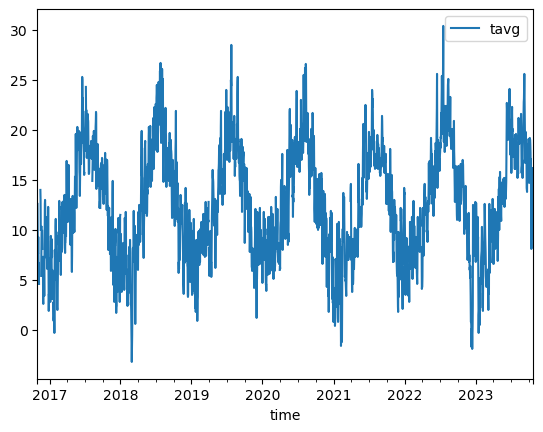

In [5]:
data.plot(y=['tavg'])
plt.show()

## Analyzing Weather Data

In the provided code snippet, we delve into the exploration and preprocessing of a dataset containing temperature data. 

### Exploring the Data Structure

To understand the data's structure and attributes, the `info()` method provides a concise summary:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2552 entries, 2016-10-31 to 2023-10-26
Freq: D
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    2526 non-null   float64
 1   tmin    2526 non-null   float64
 2   tmax    2526 non-null   float64
 3   prcp    1020 non-null   float64
 4   snow    0 non-null      float64
 5   wdir    2318 non-null   float64
 6   wspd    2526 non-null   float64
 7   wpgt    1838 non-null   float64
 8   pres    2084 non-null   float64
 9   tsun    0 non-null      float64
dtypes: float64(10)
memory usage: 219.3 KB


This method reveals the columns present in the dataset, their data types, and the number of non-null entries.

### Counting the Average Temperature Entries
To determine the total number of average temperature readings in the dataset, we calculate the length of the `tavg` column:

In [7]:
len(data['tavg'])

2552

###  Creating a Numerical Index
For easier referencing or plotting, we add a numerical index to our dataset. This is achieved by creating a new column, number, which is populated using a range equal to the length of the 'tavg' column:

In [8]:
data['number'] = np.arange((len(data['tavg'])))

This column can be utilized as an X-axis when plotting or for other numerical operations.

### Preprocessing the Data
Before any analysis, it's essential to ensure that our data is clean and doesn't contain any missing values. In the context of this dataset, any missing values in the 'tavg' column are filled using a forward-fill method:

In [9]:
data['tavg'].fillna(method='ffill', inplace=True)

With the data cleaned, we then convert the `number` and `tavg` columns into numpy arrays for potential numerical operations or plotting:

In [10]:
x = np.array(data['number'])
y = np.array(data['tavg'])

## Modeling Temperature with a Sinusoidal Function

When analyzing the temperature data, we observe a periodic variation intertwined with some noise. This observation hints towards a combination of deterministic and stochastic behavior in the temperature pattern. When you come across the term "stochastic", think "randomness".

Given this periodic nature, we'll represent the deterministic part of the temperature data with a sinusoidal function:

\\[
T_t^m = A + Bt + C \sin(\omega t + \phi)
\\]

### Sinusoidal Model for Average Temperature

Instead of employing a Fourier Transform FFT to fit our model, we'll tackle a straightforward optimization problem to determine the parameters A, B, C, and Phi.

### Code Implementation

Let's delve into the coding aspect of this analysis:

First, we need to handle the necessary imports:

In [11]:
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import norm,normaltest,probplot
from scipy import optimize
from matplotlib import style
from statistics import pstdev
import pylab 

Here's the formula for our sinusoidal function:

In [12]:
def form(x,A,B,C,phi):
    return A + B * x + C * np.sin(np.radians(x - phi))

Using the SciPy library, especially the `curve_fit` function, we'll attempt to fit our sinusoidal model to the data:

In [13]:
param, covariance = optimize.curve_fit(form, x, y, [0, 0, 0, 0])
fit_cosin = form(x, *param)

The estimated parameters are:

In [14]:
param

array([ 1.24087922e+01,  6.62091042e-05, -6.58144024e+00,  1.18170811e+01])

Next, let's visualize our fitted sinusoidal model against the raw data:

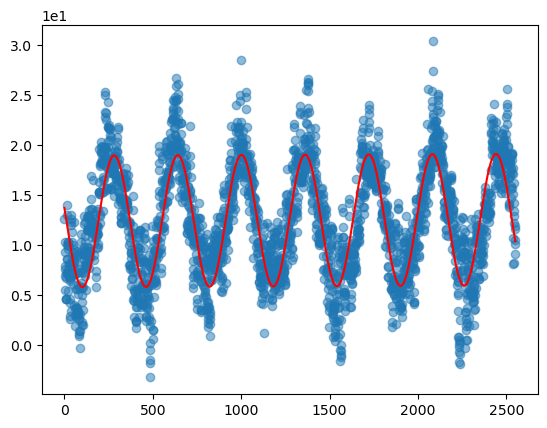

In [15]:
plt.scatter(x, y, label='data', alpha=0.5)
plt.plot(x, fit_cosin, 'r-')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))  # Increase the spacing between ticks
plt.show()

The resulting plot exhibits how our sinusoidal regression compares with the raw data. The fitted model seems quite satisfactory for capturing the periodic aspect of the temperature.

## Analyzing the Stochastic Aspect of Temperature Data
Upon inspecting the temperature data, besides the clear deterministic periodic trend, we also observe an inherent randomness or "noise". To further analyze this stochastic behavior, our strategy will be:

1. Isolate the stochastic noise from the deterministic sinusoidal trend.
2. Examine the distribution of this isolated noise.
3. Use statistical tools to ascertain the nature of this distribution.

### Isolating the Stochastic Noise
By subtracting the fitted sinusoidal model from the raw temperature data, we can filter out the deterministic trend and be left with the stochastic noise:

In [16]:
projection_mean = y - fit_cosin 

Let's visualize this isolated noise:

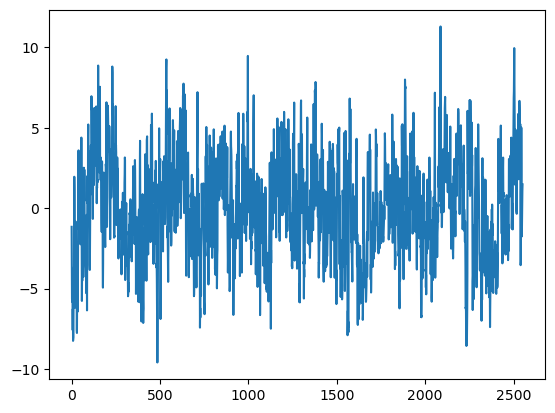

In [17]:
plt.plot(projection_mean)
plt.show()

From the plot, we can observe a noisy pattern, but the question remains: How is this noise distributed?

### Analyzing the Noise Distribution
A histogram can give us an initial idea of the noise distribution:

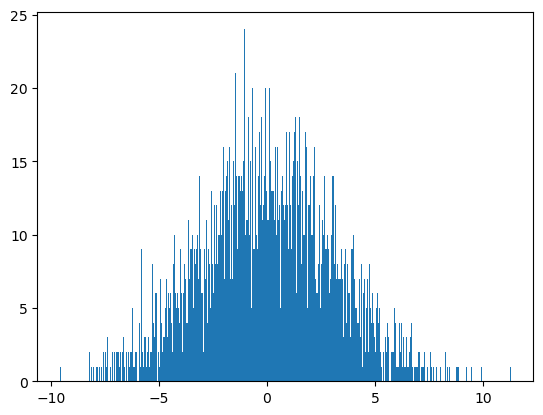

In [18]:
plt.hist(projection_mean, bins=500)
plt.show()

From the histogram, there appears to be a bell-shaped curve, hinting towards a normal distribution. However, this isn't conclusive evidence. To further confirm our suspicion, we employ the QQ-Plot:

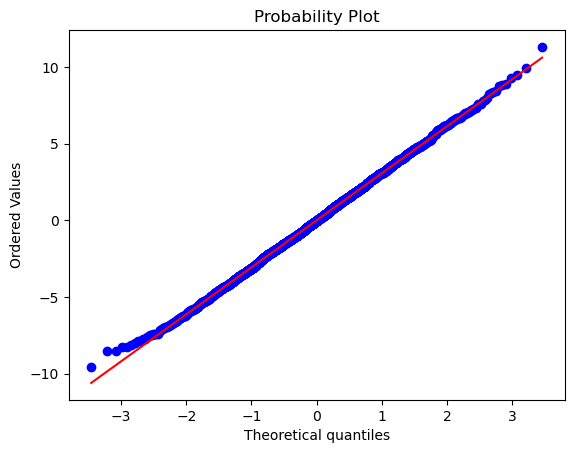

In [19]:
probplot(projection_mean, dist="norm", plot=pylab)
pylab.show()

The QQ-Plot reaffirms our assumption, as the data points closely align with the straight line, suggesting that the noise in our temperature data does indeed follow a normal distribution.

### Next Steps
With this newfound understanding that our data noise is normally distributed, we're equipped to delve deeper using stochastic calculus, allowing for a more profound analysis of the temperature patterns.

## Ornstein-Uhlenbeck Process in Analyzing Temperature Data

The fit from our previous modeling looks promising. Now, let's dive into the stochastic or the "random" aspect of the data. For this purpose, we will use the **Ornstein-Uhlenbeck process (OU Process)**, a mean-reverting stochastic process.

### Introduction to Ornstein-Uhlenbeck Process

The Ornstein-Uhlenbeck process, in essence, describes a value that tends to revert to a mean over time. This makes it a perfect candidate for our temperature noise, which oscillates around an average.

Mathematically, the OU process can be described by the following stochastic differential equation (SDE):

\\[ dT_t = \kappa (\theta - T_t) dt + \sigma dW_t \\]

Where:
- \\( \kappa \\) is the rate at which the process reverts to the mean.
- \\( \theta \\) is the long-term mean of the process.
- \\( \sigma \\) is the volatility.
- \\( dW_t \\) is a Wiener process or Brownian motion.

### Linear Regression Between \\( T_{t} \\) and \\( T_{t+1} \\)

To determine the parameters for the OU process, we'll explore the linear relationship between successive time steps in our data. We aim to identify how the temperature at one time step \\( T_{t} \\) predicts the temperature at the next time step \\( T_{t+1} \\).


b :  0.7987869491357769
a :  0.0009183407454530911
se :  33.06845438046762


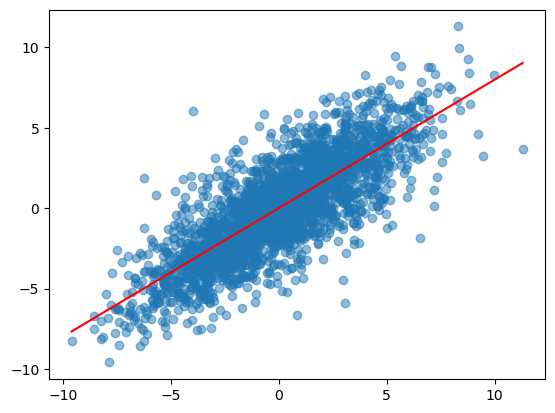

In [20]:
absc = projection_mean[:-1].reshape((-1, 1))
ordo = projection_mean[1:]
model = LinearRegression(fit_intercept=True)
model.fit(absc, ordo)
b = model.coef_[0]
a = model.intercept_
x_test=np.linspace(min(absc[:-1]),max(absc[:-1]),num=len(absc)).reshape((-1, 1))
y_pred = model.predict(x_test)

se = mean_squared_error(ordo, y_pred)
print("b : ",b)
print("a : ", a)
print("se : ", se)

plt.scatter(absc,ordo,alpha=0.5)
plt.plot(x_test,y_pred,c="red")
plt.show()

### Extracting Parameters for the OU Process
Using the regression coefficients and the error term, we can determine the parameters for the OU process:

In [21]:
K = -np.log(b)
theta = a/(1-b)
sigma = se*np.sqrt(-2*np.log(b)/(1-b**2))/10

In [22]:
print("K ：", K)
print("theta : ",theta)
print("sigma : ",sigma)

K ： 0.22466101566135493
theta :  0.004564021774476148
sigma :  3.684468231562545


### Simulating the OU Process
Using the derived parameters, let's simulate the OU process and compare it to our actual temperature noise.

In [23]:
def OU(x,t,K,theta,sigma):
    res=[x]
    for i in range(t):
        ou_t = res[-1]*np.exp(-K)+theta*(1-np.exp(-K))+sigma*np.sqrt((1-np.exp(-2*K))/(2*K))*np.random.normal(0,1)
        res.append(ou_t)
    return np.array(res)

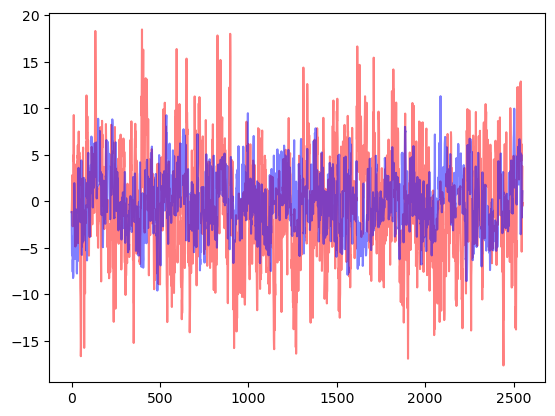

In [24]:
res= OU(projection_mean[0],len(projection_mean)-1,K,theta,sigma)
plt.plot(res,alpha=0.5,c="red")
plt.plot(projection_mean[:-1],alpha=0.5,c="blue")
plt.show()

### Comparing Distributions and Autocorrelation
Finally, let's visualize and compare the distributions and autocorrelation of the generated noise from the OU process and our temperature data.

In [25]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

#### Autocorrelation of the Data

In the first plot, we explore the autocorrelation of our data. The autocorrelation provides insights into how the data points relate to their previous values, showing the level of dependence over time.

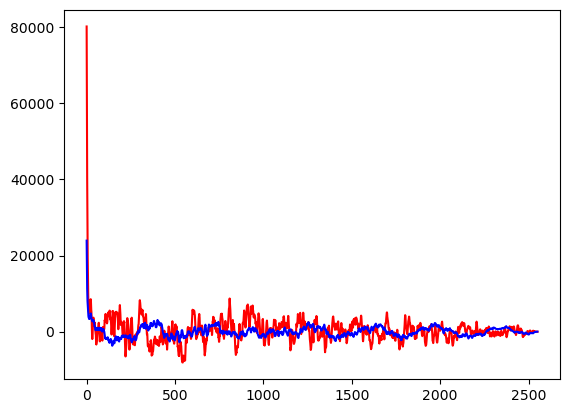

In [26]:
plt.plot(autocorr(res),c="red")
plt.plot(autocorr(projection_mean[:-1]),c="blue")
plt.show()

Here, the red curve represents the autocorrelation of our generated data from the Ornstein-Uhlenbeck process, while the blue curve represents the autocorrelation of our original temperature data.

#### Distribution of the Data
In the second plot, we visualize the distribution of our data to understand its spread and central tendency.

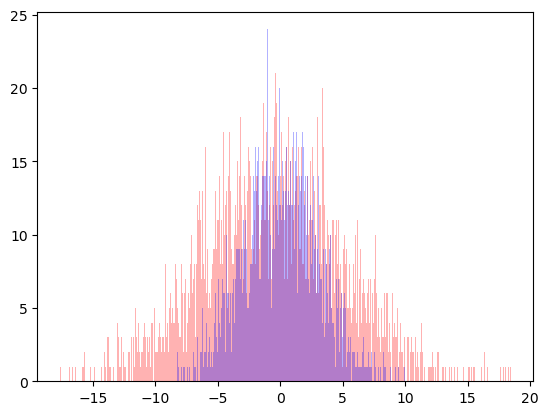

In [27]:
plt.hist(res,bins=500,color="red",alpha=0.3)
plt.hist(projection_mean[:-1],bins=500,color="blue",alpha=0.3)
plt.show()

Here, the red histogram illustrates the distribution of our generated data from the Ornstein-Uhlenbeck process. In contrast, the blue histogram showcases the distribution of our original temperature data.

By analyzing the autocorrelation and distributions, we can observe how closely the simulated OU process mimics the nature of our temperature noise.

### Ornstein-Uhlenbeck Process for Temperature Prediction

After exploring the autocorrelation of our temperature data and comparing it with the autocorrelation from the Ornstein-Uhlenbeck (OU) process, we noticed a periodic signal in our temperature noise. This implies that our initial sinusoidal fitting was not perfect.

Now, to anticipate the future temperature, we'll forecast it for the next 5 months. This prediction is essential for determining the price of our HDD call option.

For our analysis, we will:

1. Generate a one-time series using noisy data from our OU process.
3. Use the Monte-Carlo method for \\( \mu_n \\) estimation based on \\( T_t \\).
2. Determine the HDD call option price.

Let's dive into the code:

In [28]:
def pred_T(n,x0,t0):
    new_x = np.array([x0+i for i in range(N)])
    fit_cosin_future = form(new_x, *param)
    ou_test= OU(projection_mean[-1],n-1,K,theta,sigma)
    temprerature_prediction = fit_cosin_future + ou_test
    return temprerature_prediction

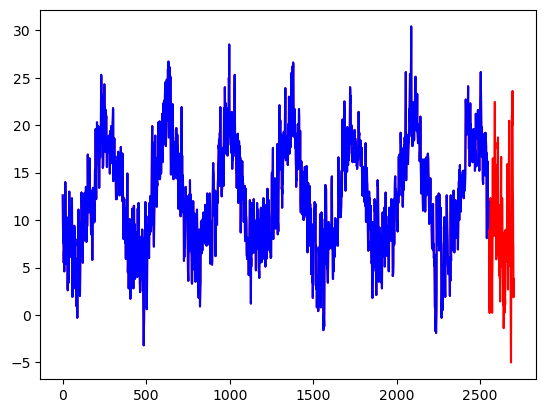

In [29]:
N = 30 * 5
temprerature_prediction = pred_T(N, x[-1], y[-1])
plt.plot([i for i in range(len(x) + N)],list(y) + list(temprerature_prediction),c="red")
plt.plot(x,y,c="blue")
plt.show()

### Monte-Carlo Simulation for Temperature Prediction

#### Initializing the Referential Temperature
We begin by setting a referential temperature using the last available data point.

In [30]:
referential =y[-1]

#### Difference Function `H`
The function `H` calculates the total difference between the predicted temperatures over `n` periods and the referential temperature stretched over the same periods. Essentially, it computes the discrepancy between our model's predictions and a hypothetical scenario where the temperature remains constant at the referential value.

In [31]:
def H(n,x0,t0):
    return (referential  *n - np.sum(pred_T(n,x0,t0)))

#### Running the Simulation
We perform a Monte-Carlo simulation by calling the `H` function `n_sim` times, where `n_sim` is the number of simulations we intend to run. This allows us to gauge the variability and the central tendency of our prediction differences.

In [32]:
n_sim=1000
sim = np.array([H(N,x[-1],y[-1]) for i in range(n_sim)])

#### Calculating Statistics from the Simulation
From our array of differences (`sim`), we can calculate important statistics like the mean (`mu_n`) and the standard deviation (`sigma_n`).

In [33]:
mu_n = np.mean(sim)
sigma_n=pstdev(sim)
print("mu_n : ",mu_n)
print("sigma_n : ",sigma_n)

mu_n :  626.9881051798002
sigma_n :  198.66911855468723


#### Plotting the Results
To visualize the distribution of our differences, we plot the results from our simulation.

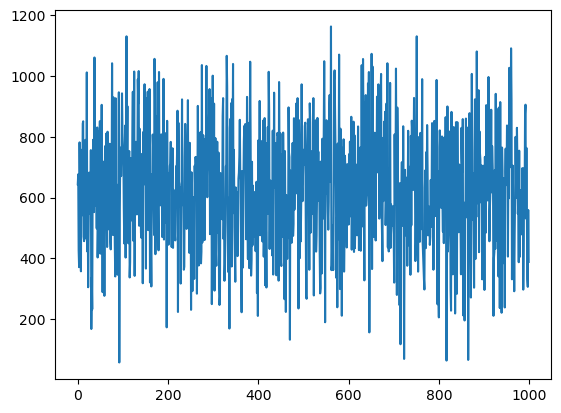

In [34]:
plt.plot(sim)
plt.show()

## Pricing the HDD Call Option
Having computed `mu_n` from our Monte-Carlo simulation, we can now proceed to calculate the Heating Degree Days (HDD) call option price. This option type allows entities to hedge against extreme temperature variations.

### The Interest Rate
First, we establish an annualized interest rate, `r`, which is then scaled down to a daily rate:

In [35]:
r = 0.05/365

### HDD Call Option Pricing Function
The `call_hdd` function calculates the HDD call option price. It takes in the maturity `t`, the strike price strike, and the interest rate `r`:

In [36]:
def call_hdd(t, strike, r):
    return( np.exp(- r  *t) * ((strike-mu_n) * (norm.cdf(alpha_n)-norm.cdf(-mu_n/sigma_n)) + sigma_n/np.sqrt(2 * np.pi) * (np.exp((-alpha_n ** 2)/2)-np.exp(-((mu_n/sigma_n) ** 2)/2))) )

### Pricing Across Various Strikes
We'll compute the call option price for a range of strike prices. This range stretches from 0 to 1000 and consists of 10,000 data points:

In [37]:
strike_array = np.linspace(0, 1000, num=10000)

For each strike price in this range, we:

- Calculate `alpha_n`
- Print the calculated values
- Compute the call option price
- Append the price to the prime_aray list

In [38]:
prime_aray = []
for strike in strike_array:
    alpha_n = (strike - mu_n)/sigma_n
    print("alpha_n : ", alpha_n)
    print("N : ", N)
    print("mu_n", mu_n)
    prime_aray.append(call_hdd(N, strike, r))
    print("CALL HDD Strike ", strike, " : ", prime_aray[-1])

alpha_n :  -3.155941445460284
N :  150
mu_n 626.9881051798002
CALL HDD Strike  0.0  :  0.0
alpha_n :  -3.1554380456278004
N :  150
mu_n 626.9881051798002
CALL HDD Strike  0.1000100010001  :  6.76649075875343e-08
alpha_n :  -3.154934645795317
N :  150
mu_n 626.9881051798002
CALL HDD Strike  0.2000200020002  :  2.7080304047833595e-07
alpha_n :  -3.1544312459628334
N :  150
mu_n 626.9881051798002
CALL HDD Strike  0.3000300030003  :  6.09629745083479e-07
alpha_n :  -3.1539278461303497
N :  150
mu_n 626.9881051798002
CALL HDD Strike  0.4000400040004  :  1.0843606731528165e-06
alpha_n :  -3.153424446297866
N :  150
mu_n 626.9881051798002
CALL HDD Strike  0.5000500050005  :  1.6952117893749918e-06
alpha_n :  -3.1529210464653823
N :  150
mu_n 626.9881051798002
CALL HDD Strike  0.6000600060006  :  2.4423993622084177e-06
alpha_n :  -3.1524176466328986
N :  150
mu_n 626.9881051798002
CALL HDD Strike  0.7000700070007  :  3.326139972734519e-06
alpha_n :  -3.1519142468004153
N :  150
mu_n 626.988105

CALL HDD Strike  165.5165516551655  :  0.4943160520206613
alpha_n :  -2.322311322867393
N :  150
mu_n 626.9881051798002
CALL HDD Strike  165.6165616561656  :  0.49522736721240723
alpha_n :  -2.321807923034909
N :  150
mu_n 626.9881051798002
CALL HDD Strike  165.7165716571657  :  0.4961400093080621
alpha_n :  -2.3213045232024254
N :  150
mu_n 626.9881051798002
CALL HDD Strike  165.8165816581658  :  0.4970539798595768
alpha_n :  -2.320801123369942
N :  150
mu_n 626.9881051798002
CALL HDD Strike  165.9165916591659  :  0.4979692804203831
alpha_n :  -2.3202977235374584
N :  150
mu_n 626.9881051798002
CALL HDD Strike  166.016601660166  :  0.4988859125454024
alpha_n :  -2.3197943237049747
N :  150
mu_n 626.9881051798002
CALL HDD Strike  166.1166116611661  :  0.4998038777910274
alpha_n :  -2.319290923872491
N :  150
mu_n 626.9881051798002
CALL HDD Strike  166.2166216621662  :  0.5007231777151276
alpha_n :  -2.3187875240400073
N :  150
mu_n 626.9881051798002
CALL HDD Strike  166.3166316631663  

CALL HDD Strike  344.7344734473447  :  6.504595503962271
alpha_n :  -1.4202188230567274
N :  150
mu_n 626.9881051798002
CALL HDD Strike  344.8344834483448  :  6.51213333121872
alpha_n :  -1.419715423224244
N :  150
mu_n 626.9881051798002
CALL HDD Strike  344.9344934493449  :  6.519678335625786
alpha_n :  -1.4192120233917602
N :  150
mu_n 626.9881051798002
CALL HDD Strike  345.034503450345  :  6.527230522315582
alpha_n :  -1.4187086235592765
N :  150
mu_n 626.9881051798002
CALL HDD Strike  345.13451345134513  :  6.534789896422126
alpha_n :  -1.418205223726793
N :  150
mu_n 626.9881051798002
CALL HDD Strike  345.23452345234523  :  6.542356463081235
alpha_n :  -1.4177018238943093
N :  150
mu_n 626.9881051798002
CALL HDD Strike  345.33453345334533  :  6.549930227430603
alpha_n :  -1.4171984240618256
N :  150
mu_n 626.9881051798002
CALL HDD Strike  345.43454345434543  :  6.5575111946097495
alpha_n :  -1.4166950242293421
N :  150
mu_n 626.9881051798002
CALL HDD Strike  345.53455345534553  : 

CALL HDD Strike  563.3563356335633  :  49.94182508257879
alpha_n :  -0.31978678924751236
N :  150
mu_n 626.9881051798002
CALL HDD Strike  563.4563456345634  :  49.978435731317454
alpha_n :  -0.3192833894150287
N :  150
mu_n 626.9881051798002
CALL HDD Strike  563.5563556355635  :  50.01506507552839
alpha_n :  -0.31877998958254505
N :  150
mu_n 626.9881051798002
CALL HDD Strike  563.6563656365636  :  50.05171311821906
alpha_n :  -0.31827658975006146
N :  150
mu_n 626.9881051798002
CALL HDD Strike  563.7563756375637  :  50.08837986239271
alpha_n :  -0.3177731899175778
N :  150
mu_n 626.9881051798002
CALL HDD Strike  563.8563856385638  :  50.12506531104828
alpha_n :  -0.3172697900850942
N :  150
mu_n 626.9881051798002
CALL HDD Strike  563.9563956395639  :  50.16176946718049
alpha_n :  -0.31676639025261055
N :  150
mu_n 626.9881051798002
CALL HDD Strike  564.056405640564  :  50.19849233377981
alpha_n :  -0.3162629904201269
N :  150
mu_n 626.9881051798002
CALL HDD Strike  564.1564156415641  

CALL HDD Strike  769.0769076907691  :  165.65330013866685
alpha_n :  0.7157066661713153
N :  150
mu_n 626.9881051798002
CALL HDD Strike  769.1769176917692  :  165.7279613661664
alpha_n :  0.7162100660037989
N :  150
mu_n 626.9881051798002
CALL HDD Strike  769.2769276927693  :  165.8026378240922
alpha_n :  0.7167134658362826
N :  150
mu_n 626.9881051798002
CALL HDD Strike  769.3769376937694  :  165.87732950695604
alpha_n :  0.7172168656687662
N :  150
mu_n 626.9881051798002
CALL HDD Strike  769.4769476947695  :  165.9520364092678
alpha_n :  0.7177202655012498
N :  150
mu_n 626.9881051798002
CALL HDD Strike  769.5769576957696  :  166.02675852553546
alpha_n :  0.7182236653337334
N :  150
mu_n 626.9881051798002
CALL HDD Strike  769.6769676967697  :  166.10149585026514
alpha_n :  0.7187270651662171
N :  150
mu_n 626.9881051798002
CALL HDD Strike  769.7769776977698  :  166.176248377961
alpha_n :  0.7192304649987007
N :  150
mu_n 626.9881051798002
CALL HDD Strike  769.8769876987699  :  166.25

CALL HDD Strike  963.5963596359635  :  332.57361994092605
alpha_n :  1.6948193403519753
N :  150
mu_n 626.9881051798002
CALL HDD Strike  963.6963696369636  :  332.6671009066308
alpha_n :  1.695322740184459
N :  150
mu_n 626.9881051798002
CALL HDD Strike  963.7963796379637  :  332.7605865519089
alpha_n :  1.6958261400169428
N :  150
mu_n 626.9881051798002
CALL HDD Strike  963.8963896389638  :  332.8540768727689
alpha_n :  1.6963295398494262
N :  150
mu_n 626.9881051798002
CALL HDD Strike  963.9963996399639  :  332.9475718652216
alpha_n :  1.69683293968191
N :  150
mu_n 626.9881051798002
CALL HDD Strike  964.096409640964  :  333.0410715252802
alpha_n :  1.6973363395143937
N :  150
mu_n 626.9881051798002
CALL HDD Strike  964.1964196419641  :  333.13457584895997
alpha_n :  1.6978397393468772
N :  150
mu_n 626.9881051798002
CALL HDD Strike  964.2964296429642  :  333.2280848322782
alpha_n :  1.6983431391793609
N :  150
mu_n 626.9881051798002
CALL HDD Strike  964.3964396439643  :  333.3215984

### Visualization
Finally, we visualize our computed call option prices against their respective strike prices. A red vertical line indicates the position of `mu_n`:

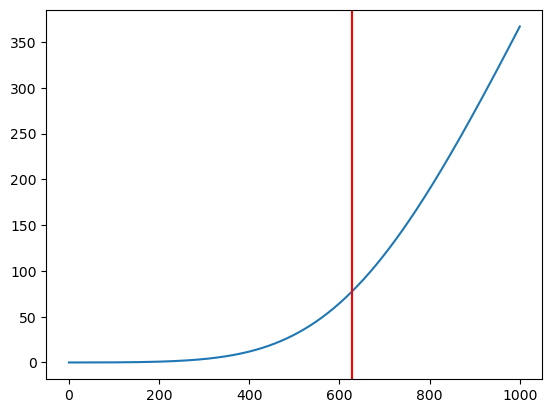

In [39]:
plt.plot(strike_array, prime_aray)
plt.axvline(mu_n, c="red")
plt.show()

## Conclusion:
The resulting graph showcases a typical call option shape, resembling call options in conventional stock market finance. By following this method, you've successfully priced a weather derivative!